In [ ]:
Regularization techniques:
    1. Rigid Regression (L2 Regularization) -- It is used to Overcome overfitting
    2. Lasso Regression (L1 Regularization) -- It is used feature selection
    3. Elasticnet Regression -- It helps to perform both rigid and lasso combination.

L1 - While applying cost function in that the coefficient which remains less that feature will be removed and other feature is used for best performance accuracy

L2 - It will add the hyperparameter and make cost function as not zero ( While training data set the accuracy is very high and when it comes to testing data accuracy is very low and the cost function is becoming zero this is why we use rigid regression)
#### overfitting - low bais high variance

In linear regression we can't modify much with the parameters so this is the reason specifically we need to use both lasso and  for overfitting and Feature selection

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
data = pd.read_csv("Algerian_forest_fires_cleaned_dataset.csv")

In [47]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [49]:
data.drop(['day','month','year'],axis=1,inplace=True)

In [50]:
data.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [51]:
data.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [52]:
data.isnull().any()

Temperature    False
RH             False
Ws             False
Rain           False
FFMC           False
DMC            False
DC             False
ISI            False
BUI            False
FWI            False
Classes        False
Region         False
dtype: bool

In [53]:
data['Region'].value_counts()

Region
0    122
1    121
Name: count, dtype: int64

In [54]:
data['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [55]:
data['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [56]:
# Data Cleaning and Encoding

In [57]:
data['Classes']=data['Classes'].str.strip()

In [58]:
data['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [59]:
data['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [60]:
from sklearn.preprocessing import OneHotEncoder

In [61]:
ohe = OneHotEncoder()

In [62]:
encoded =ohe.fit_transform(data[['Classes']]).toarray()

In [63]:
data_class = pd.DataFrame(encoded,columns=ohe.get_feature_names_out())

In [64]:
data = pd.concat([data,data_class],axis=1)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Temperature       243 non-null    int64  
 1   RH                243 non-null    int64  
 2   Ws                243 non-null    int64  
 3   Rain              243 non-null    float64
 4   FFMC              243 non-null    float64
 5   DMC               243 non-null    float64
 6   DC                243 non-null    float64
 7   ISI               243 non-null    float64
 8   BUI               243 non-null    float64
 9   FWI               243 non-null    float64
 10  Classes           243 non-null    object 
 11  Region            243 non-null    int64  
 12  Classes_fire      243 non-null    float64
 13  Classes_not fire  243 non-null    float64
dtypes: float64(9), int64(4), object(1)
memory usage: 26.7+ KB


In [66]:
data.drop(['Classes'],axis=1,inplace=True)

In [67]:
data.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Region', 'Classes_fire', 'Classes_not fire'],
      dtype='object')

In [68]:
# Now data is perfect to train 

In [69]:
x = data.drop(['FWI'],axis=1)
y = data['FWI']

In [70]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [71]:
x_train.shape, x_test.shape

((182, 12), (61, 12))

In [72]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Region,Classes_fire,Classes_not fire
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.254549,0.542141,-0.542141
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.394665,-0.456876,0.456876
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.199969,-0.082570,0.082570
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.059022,-0.369357,0.369357
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.249514,0.781259,-0.781259
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.212582,0.617273,-0.617273
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,-0.060838,0.543581,-0.543581
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.296441,0.742977,-0.742977
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.114897,0.612239,-0.612239
Region,0.254549,-0.394665,-0.199969,-0.059022,0.249514,0.212582,-0.060838,0.296441,0.114897,1.000000,0.188837,-0.188837


<Axes: >

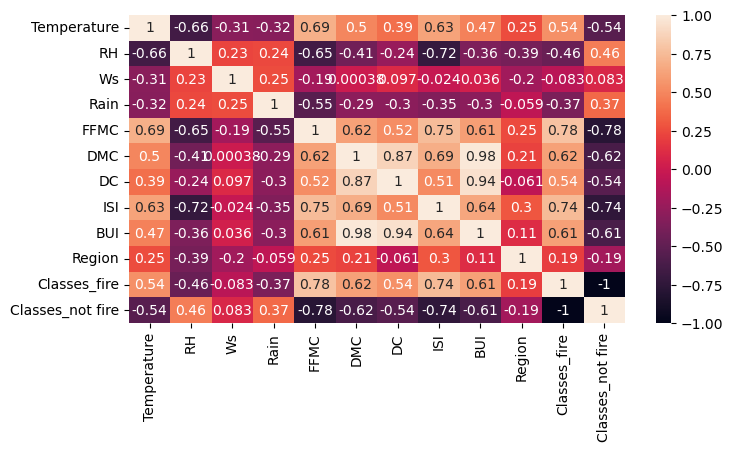

In [85]:
plt.figure(figsize=(8,4))
corr = x_train.corr()
sns.heatmap(corr,annot = True)

# We all know heat map is used to understand the relationship between the variables

What are the strong graphs and what are the weak graph? 

strong and weak correlations in your heat map 

#### strong positive correlations are seen between 
1. classes and dc 0 .74
2. classes fire and dmc 0 .64
3. classes _fire and isi 0 .61
#### strong negative correlations
1. classes not fire and classes _fire have a value of 1.00
2. temperature and RH show 0 .66
#### weak correlations close to zero are observed between
1. classes and RH minus 0.083
2. clusters _fire and drain 0 .037

# Conclusion: 
Based on the heat map the strongest positive correlations are between classes_fire and DC,DMC and ISI for negative correlations temperature and RH show a strong link classes_fire and RH along with rain have weak correlations this suggests DC, DMC and ISI might be good predictors for your fire classification model while Rain and RH might not be as helpful

#### Now what we do is we will add a threshold and we will verify the features which are above the threshold and only that features are used to train

In [80]:
def correleation(dataset,threshold):
    featuresabove_threshold_of_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                featuresabove_threshold_of_corr.add(colname)
    return featuresabove_threshold_of_corr

In [81]:
corr_features = correleation(x_train,0.85)
# 0.85 is Threshold value it will be given by the domain expert
# Now we are finding features which has the correlation greater than threshold and remove them

In [84]:
corr_features

{'BUI', 'Classes_not fire', 'DC'}

In [86]:
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)
x_train.shape,x_test.shape

((182, 9), (61, 9))

In [87]:
## Feature Scaling Or Standardization

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [89]:
# Box Plots to Understand Effect of Standard scalar

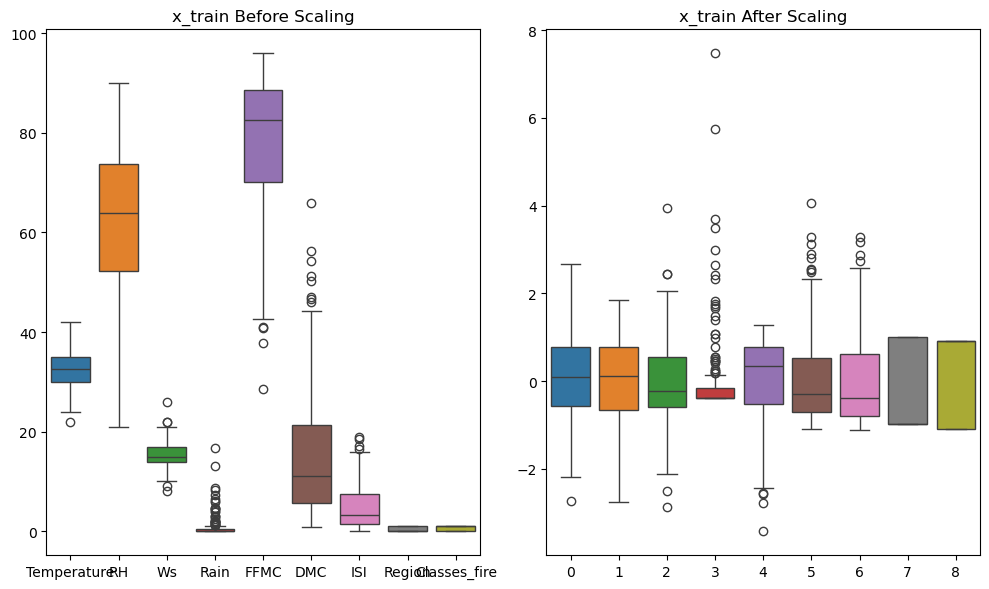

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with specified size and 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 6)) 
# First boxplot: before scaling
sns.boxplot(data=x_train, ax=axes[0])
axes[0].set_title("x_train Before Scaling")
# Second boxplot: after scaling
sns.boxplot(data=x_train_scaled, ax=axes[1])
axes[1].set_title("x_train After Scaling")
plt.tight_layout()  # Optional: improves spacing
plt.show()


## Linear Regression Model


In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [94]:
lr=LinearRegression()
lr.fit(x_train_scaled,y_train)


LinearRegression()

In [95]:
y_pred = lr.predict(x_test_scaled)

In [102]:
mse = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error -",mse)
print("R squre Score - ",score)


Mean Absolute Error - 0.5468236465249976
R squre Score -  0.9847657384266952


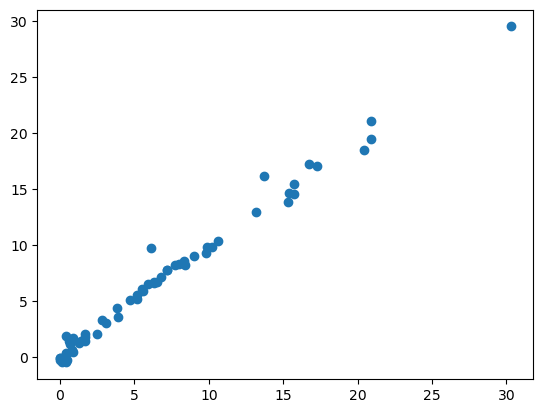

In [100]:
plt.scatter(y_test,y_pred)

## LAsso Regression

In [103]:
# Regression (L1 Regularization) -- It is used feature selection

In [104]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [105]:
lasso=Lasso()
lasso.fit(x_train_scaled,y_train)


Lasso()

In [106]:
y_pred = lasso.predict(x_test_scaled)

In [107]:
mse = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error -",mse)
print("R squre Score - ",score)


Mean Absolute Error - 1.1331759949144087
R squre Score -  0.9492020263112388


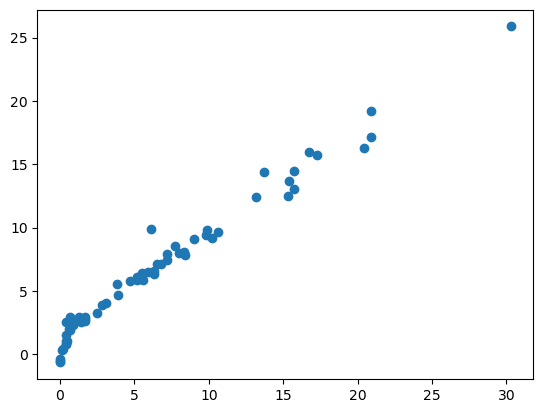

In [108]:
plt.scatter(y_test,y_pred)

## Cross Validation Lasso 

## LAssoCV

In [110]:
from sklearn.linear_model import LassoCV
LassoCV = LassoCV(cv=5)
LassoCV.fit(x_train_scaled,y_train)

LassoCV(cv=5)

In [112]:
LassoCV.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [113]:
LassoCV.alpha_

0.05725391318234411

In [114]:
LassoCV.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

Mean absolute error 0.6199476950828843
R2 Score  0.9820962755368671


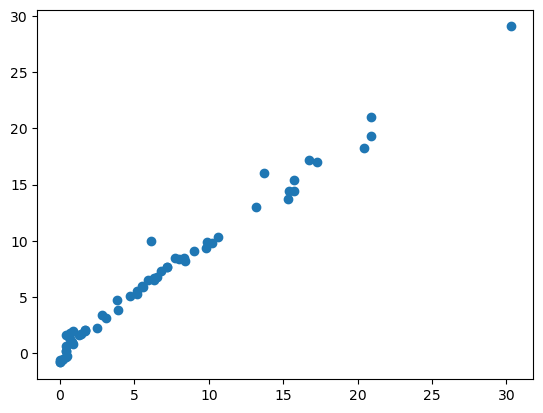

In [116]:
y_pred = LassoCV.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 Score ",score)

## Rigid Regression

In [118]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge = Ridge()
ridge.fit(x_train_scaled,y_train)

Ridge()

In [119]:
y_pred = ridge.predict(x_test_scaled)

In [121]:
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 Score ",score)

Mean absolute error 0.5642305340105686
R2 Score  0.9842993364555513


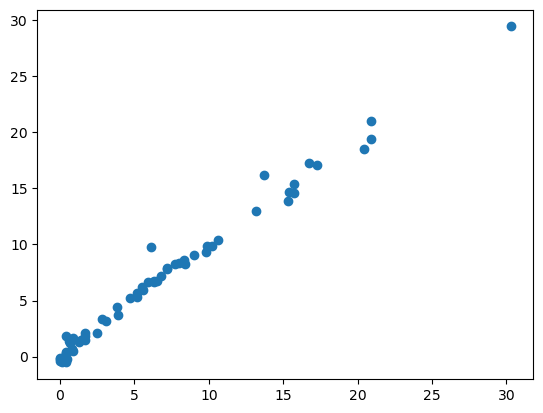

In [122]:
plt.scatter(y_test,y_pred)

## RidgeCV

Mean absolute error 0.5642305340109115
R2 Score  0.9842993364555573


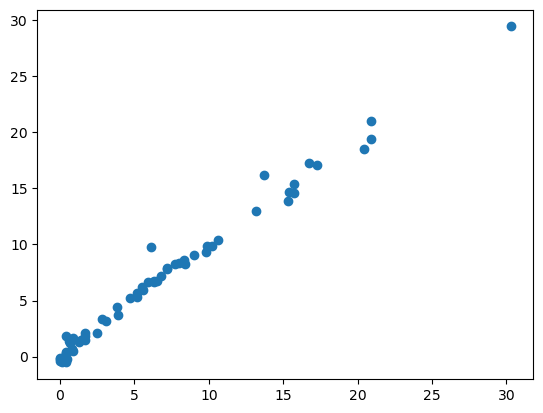

In [123]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge = RidgeCV()
ridge.fit(x_train_scaled,y_train)
y_pred = ridge.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 Score ",score)
plt.scatter(y_test,y_pred)

## Elasticnet Regression

Mean absolute error 1.8822353634896
R2 Score  0.8753460589519703


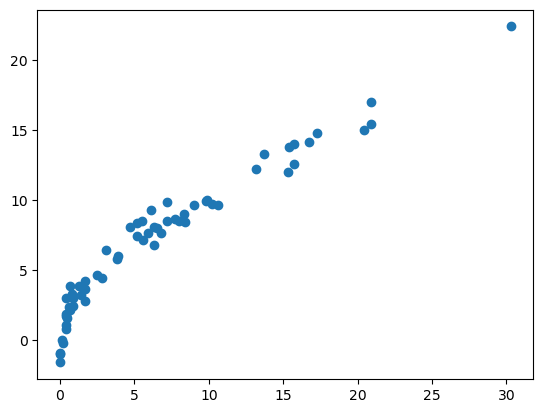

In [125]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ElasticNet = ElasticNet()
ElasticNet.fit(x_train_scaled,y_train)
y_pred = ElasticNet.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 Score ",score)
plt.scatter(y_test,y_pred)

## ElasticnetCV 

Mean absolute error 0.6575643536909074
R2 Score  0.9814222062228236


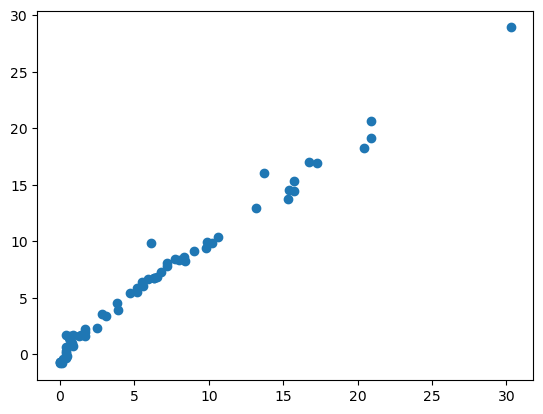

In [126]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ElasticNet = ElasticNetCV()
ElasticNet.fit(x_train_scaled,y_train)
y_pred = ElasticNet.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 Score ",score)
plt.scatter(y_test,y_pred)

In [127]:
import pickle

In [129]:
pickle.dump(scaler,open("scaler.pkl",'wb'))
pickle.dump(ridge,open("ridge.pkl",'wb'))

# Use flask before Deployment 

Flask is a lightweight Python web framework. When you're developing a machine learning model, you often want to test it in a web app before deploying it to production.

We've created a Pickle file using that We'll give the new data into the model which is present in pickle file and it will predict using Model Which we created.

1. Test in Flask if it is Working correctly then We can Deploy

2. If machine learning model is performing well in class then we create an elasticbeanstalk:container

In the Project Directory create an Folder ".ebextensions" in that file - Create an other file called - "python.config"

Paste the Below in that and add the application Name correctly (eg.if took app.py them app in place of application)


In [ ]:
option_settings:
  "aws:elasticbeanstalk:container:python":
    WSGIPath: application:application

3. After creating elastic bin stalk container We will push our Project file to Github

4. After pushing to github we use AWS for Web app Deployment

5.In AWS elasticbeanstalk is best for web apps.

AWS Elastic Beanstalk is a PaaS (Platform as a Service) by Amazon. It's used to deploy and manage web apps without needing to worry about infrastructure (like servers, load balancers, etc.).

🔄 Flask + Elastic Beanstalk = End-to-End Flow